In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


griby=pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
X_train=griby.drop('class',axis=1)
y_train=griby['class']
clf_rf = RandomForestClassifier(criterion='entropy',random_state=0)
parametrs = {'n_estimators':  range(10, 50, 10) , 'max_depth': range(1, 12, 2) ,'min_samples_leaf': range(1, 7)
             ,'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3,n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [10]:
best_clf=grid_search_cv_clf.best_estimator_


In [13]:
best_clf.feature_importances_

array([0.00306107, 0.00625037, 0.024689  , 0.06342603, 0.22663839,
       0.00043558, 0.06013994, 0.08357853, 0.07643119, 0.02049528,
       0.07729668, 0.03423649, 0.03895524, 0.02835467, 0.01322916,
       0.        , 0.01185759, 0.0110744 , 0.08977863, 0.03312335,
       0.05024433, 0.04670409])

<AxesSubplot:>

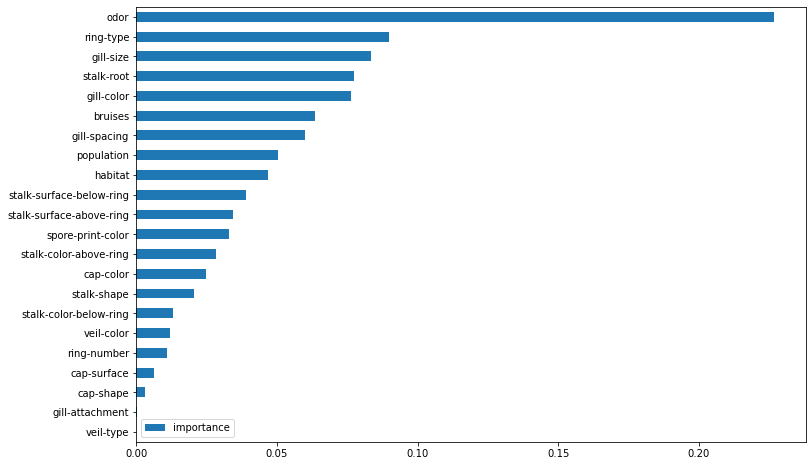

In [15]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [20]:
gg=best_clf.predict(pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv'))

In [22]:
pd.DataFrame(gg).value_counts()

0    1055
1     976
dtype: int64

In [28]:
griby_real=pd.read_csv(r'C:\Users\Admin\Downloads\testing_y_mush\testing_y_mush.csv')

In [33]:
from sklearn.metrics import confusion_matrix

fdf=confusion_matrix(griby_real, gg)

<AxesSubplot:>

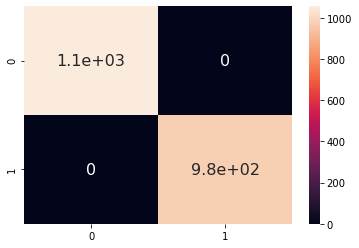

In [34]:

import seaborn as sns

sns.heatmap(fdf, annot=True,annot_kws={"size": 16})